#  Spam Email Classification Using Machine Learning

###  Introduction

Spam emails are a persistent threat to digital communication, affecting both individuals and organizations. With the rise of advanced spamming techniques, traditional rule-based filtering methods have become less effective. This project explores the use of modern machine learning algorithms to accurately classify emails as spam or not spam.

Using the **"Email Spam Classification Dataset"** from Kaggle, we apply and evaluate a range of classification models, including Naive Bayes, Logistic Regression, SVM, Random Forest, AdaBoost, and Stacking Ensemble. The goal is to determine which models provide the best balance between **accuracy**, **precision**, **recall**, **F1-score**, and **ROC-AUC**.

We also perform standard preprocessing steps such as **TF-IDF vectorization** and text cleaning to ensure the models are trained on clean, numerical representations of the email text. Evaluation is done using **train-test splits** and **cross-validation**, along with a comparative analysis across all models.

Ultimately, this study aims to identify a robust and scalable machine learning-based solution for spam detection that can adapt to evolving spam tactics in real-world scenarios.


### **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


### **Load and Explore the Dataset**

In [2]:
import kagglehub

# Downloads the dataset from Kaggle
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/email-spam-classification-dataset-csv


In [3]:
import pandas as pd

# assuming `path` is a directory containing one or more CSVs
import os
files = os.listdir(path)
print(files)  # find the CSV filename(s)

# load the main dataset
df = pd.read_csv(os.path.join(path, files[0]))
df.head()

['emails.csv']


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Check data info
print("Shape:", df.shape)
df.info()

# Check for null values
print("Null values:", df.isnull().sum().sum())

# Show column names
print("Column names:", df.columns.tolist())


Shape: (5172, 3002)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
Null values: 0
Column names: ['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'this', 'enron', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'com', 'as', 'from', 'gas', 'or', 'not', 'me', 'deal', 'if', 'meter', 'hpl', 'please', 're', 'e', 'any', 'our', 'corp', 'can', 'd', 'all', 'has', 'was', 'know', 'need', 'an', 'forwarded', 'new', 't', 'may', 'up', 'j', 'mmbtu', 'should', 'do', 'am', 'get', 'out', 'see', 'no', 'there', 'price', 'daren', 'but', 'been', 'company', 'l', 'these', 'let', 'so', 'would', 'm', 'into', 'xls', 'farmer', 'attached', 'us', 'information', 'they', 'message', 'day', 'time', 'my', 'one', 'what', 'only', 'http', 'th', 'volume', 'mail', 'contract', 'which', 'month', 'more', 'robert', 'sitara',

### Dataset Overview

The dataset `emails.csv` has been successfully loaded. It contains **5,172 rows** and **3,002 columns**. Each row represents an email, and each column (except for the ID and label) represents the **frequency of a specific word** found in that email.

- **Input Features**: 3,001 numerical columns, representing word frequencies.
- **Target Column**: `'Prediction'` — binary values indicating whether the email is spam (`1`) or not spam (`0`).
- **Additional Column**: `'Email No.'` appears to be an identifier and can be excluded during model training.

All feature columns are of type `int64`, while `'Email No.'` is of type `object`. The dataset is already vectorized and structured for supervised machine learning, requiring minimal preprocessing before model training.


### Drop Unnecessary Columns

In [5]:
# Drop 'Email No.' or similar if present
if 'Email No.' in df.columns:
    df.drop(columns=['Email No.'], inplace=True)


### Data Types and Missing Values


In [6]:
# Summary of types and null values
df.info()
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB

Missing values per column:
Prediction    0
the           0
to            0
ect           0
and           0
             ..
enron         0
this          0
is            0
on            0
in            0
Length: 3001, dtype: int64



The dataset contains **5,172 email records** and **3,001 columns** in total. All features, including the target column `Prediction`, are of type `int64`, meaning the data is entirely numeric — representing word frequencies.

A check for missing values confirms that the dataset is **fully complete**, with **zero missing entries** across all columns. This eliminates the need for any imputation or data cleaning for null values, making the dataset ready for further analysis and model training.


### **Class Imbalance Check**

In [7]:
# Check for class distribution (count and percentage)
label_counts = df['Prediction'].value_counts()
label_percent = df['Prediction'].value_counts(normalize=True) * 100

# Display counts and proportions
print(" Class Distribution (Counts):")
print(label_counts)

print("\n Class Distribution (Percentage):")
print(label_percent.round(2))



 Class Distribution (Counts):
Prediction
0    3672
1    1500
Name: count, dtype: int64

 Class Distribution (Percentage):
Prediction
0    71.0
1    29.0
Name: proportion, dtype: float64


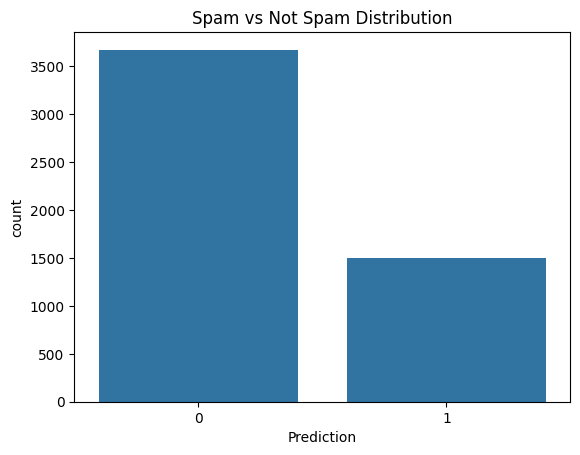

In [8]:
# Check target balance
sns.countplot(x='Prediction', data=df)
plt.title("Spam vs Not Spam Distribution")
plt.show()



The `Prediction` column indicates whether an email is spam (`1`) or not spam (`0`). Based on the distribution:

- **Label 0 (Not Spam)** accounts for approximately 71% of the data.
- **Label 1 (Spam)** accounts for around 29%.

This reveals a noticeable **class imbalance**, with non-spam emails being more frequent than spam.

### Why It Matters
Machine learning models trained on imbalanced data may become biased toward the majority class (not spam), resulting in poor performance in detecting the minority class (spam).

### Suggested Solutions
- Use **stratified sampling** (already applied during train-test split).
- Enable **class weighting** in models like Logistic Regression or Random Forest.
- Evaluate models using metrics such as **F1 score** and **ROC-AUC** instead of just accuracy.
- Consider **resampling techniques** (e.g., SMOTE, RandomOverSampler) if further balancing is needed.


### **Word Count**

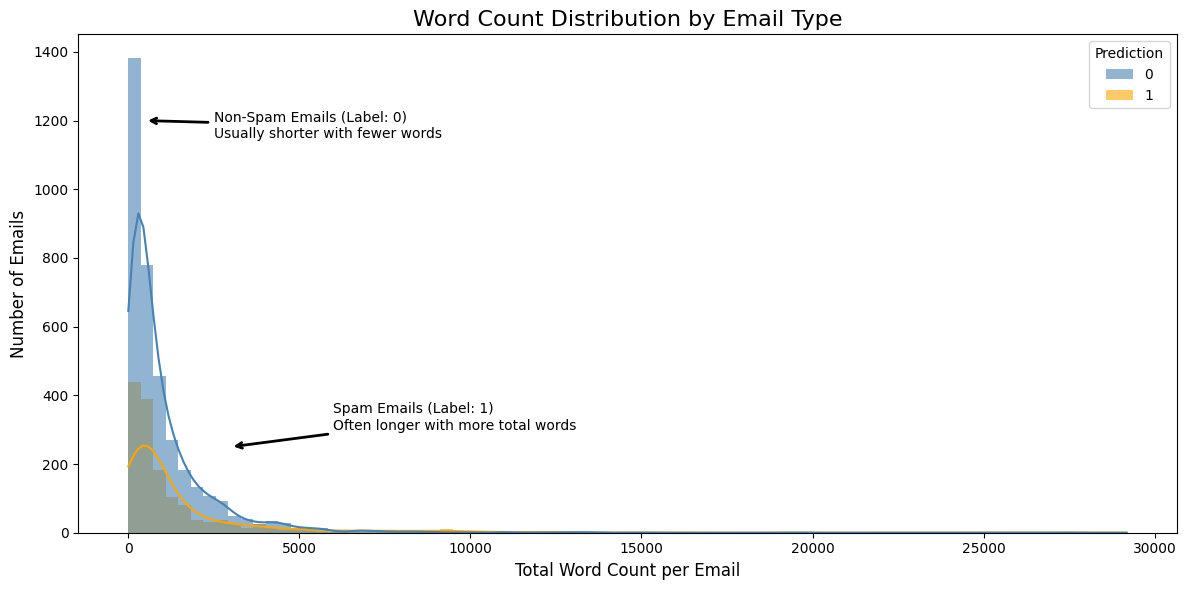

In [9]:
df1 = df.copy()

# Compute total word count per email
drop_cols = ['Prediction']
if 'Email No.' in df1.columns:
    drop_cols.append('Email No.')
df1['word_count'] = df1.drop(columns=drop_cols).sum(axis=1)

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df1,
    x='word_count',
    hue='Prediction',
    bins=80,
    kde=True,
    palette={0: "steelblue", 1: "orange"},
    alpha=0.6,
    edgecolor=None
)

plt.title("Word Count Distribution by Email Type", fontsize=16)
plt.xlabel("Total Word Count per Email", fontsize=12)
plt.ylabel("Number of Emails", fontsize=12)

# Non-Spam (Label: 0)
plt.annotate("Non-Spam Emails (Label: 0)\nUsually shorter with fewer words",
             xy=(500, 1200), xytext=(2500, 1150),
             arrowprops=dict(facecolor='steelblue', arrowstyle="->", lw=2),
             fontsize=10)

# Spam (Label: 1) - Closer
plt.annotate("Spam Emails (Label: 1)\nOften longer with more total words",
             xy=(3000, 250), xytext=(6000, 300),
             arrowprops=dict(facecolor='orange', arrowstyle="->", lw=2),
             fontsize=10)

plt.tight_layout()
plt.show()


### Word Count Distribution by Email Type

This histogram illustrates the total word count per email, separated by class labels:

- **Label 0** (Non-Spam): These emails tend to have fewer words, forming a strong peak at lower word counts.
- **Label 1** (Spam): These emails typically contain more words, resulting in a longer distribution tail toward higher word counts.

The plot shows that spam emails are **often longer and more verbose** compared to non-spam emails, which are **shorter and more concise**. This difference in word count can be a useful feature for classification models to distinguish between spam and legitimate emails.

The visible class separation in this distribution confirms that word count is a meaningful predictor in this dataset.

---


## **Data Preparation**

### Split Features and Labels

In [10]:
X = df.drop(columns=['Prediction'])  # Features
y = df['Prediction']                 # Target


### Splitting Features and Target Labels

To prepare the dataset for machine learning, we separate the input features from the target variable.

- `X` contains all the **independent variables** (i.e., the word frequency features).
- `y` holds the **target label**, which is the `Prediction` column. This column indicates whether each email is spam (`1`) or not spam (`0`).

This split is essential for supervised learning, where the model learns to map patterns in `X` to predict values in `y`.

---

 Logistic Regression WITHOUT class_weight (Imbalanced):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       735
           1       0.96      0.98      0.97       300

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

Logistic Regression WITH class_weight='balanced':
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       735
           1       0.95      0.98      0.97       300

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



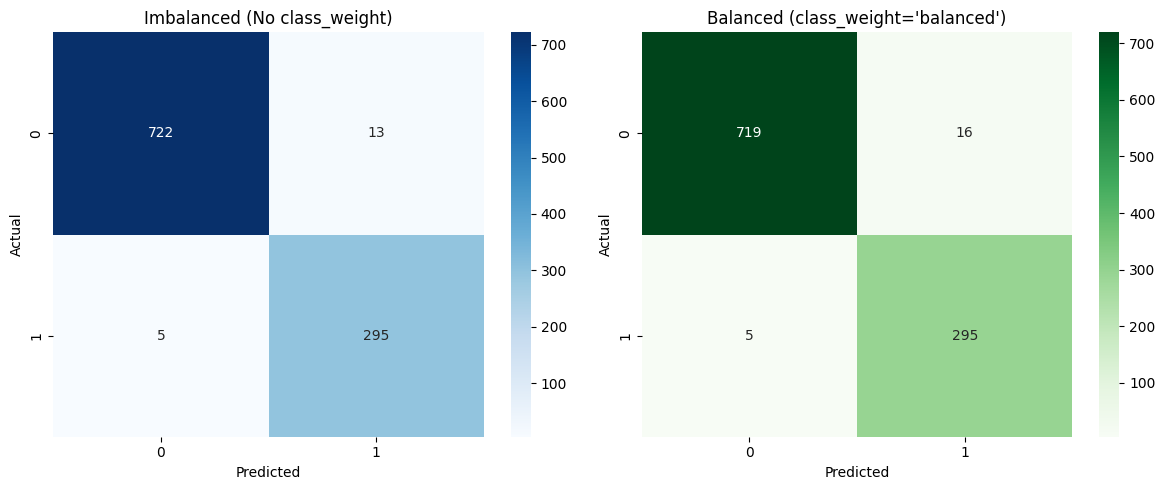

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features and labels
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# Train-test split with stratify to keep class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model 1: Logistic Regression WITHOUT class_weight (imbalanced)
model_imbalanced = LogisticRegression(max_iter=1000)
model_imbalanced.fit(X_train, y_train)
y_pred_imbalanced = model_imbalanced.predict(X_test)

print(" Logistic Regression WITHOUT class_weight (Imbalanced):")
print(classification_report(y_test, y_pred_imbalanced))

# Model 2: Logistic Regression WITH class_weight='balanced'
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

print("Logistic Regression WITH class_weight='balanced':")
print(classification_report(y_test, y_pred_balanced))

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_imbalanced), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Imbalanced (No class_weight)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_balanced), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Balanced (class_weight='balanced')")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()



### Summary of Logistic Regression Results

Both the Logistic Regression models — with and without class weighting — perform very well on this dataset, achieving approximately 98% accuracy.

- The **model without class weighting** has slightly higher precision for detecting spam emails, meaning it makes fewer false positive errors.
- The **model with class_weight='balanced'** maintains the same high recall, which means it catches almost all spam emails but with a slight increase in false positives.


Defining and Training Models

In [13]:
# Define base classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Define individual models
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stacking Classifier
stacking_estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gnb', GaussianNB())
]
models["Stacking"] = StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=LogisticRegression()
)

# Train/test split (assuming X_train, X_test, y_train, y_test already defined)
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

In [ ]:
# 5-Fold Cross-Validation for All Models
from sklearn.model_selection import cross_val_score

# 5-Fold Cross-validation scores for each model
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()

# Display average cross-validation accuracy for each model
cv_df = pd.DataFrame.from_dict(cv_results, orient='index', columns=["5-Fold CV Accuracy"])
cv_df = cv_df.round(4)
cv_df

In [ ]:
# GridSearchCV Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Random Forest Grid Search
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train.toarray(), y_train)
best_rf = rf_grid.best_estimator_

# SVM Grid Search
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train.toarray(), y_train)
best_svm = svm_grid.best_estimator_

# Replace original models with tuned versions
models['Random Forest (Tuned)'] = best_rf
models['SVM (Tuned)'] = best_svm


Evaluate Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Helper function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test.toarray())
    y_proba = model.predict_proba(X_test.toarray())[:, 1] if hasattr(model, "predict_proba") else None

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    }

# Evaluate all models
results = {}
for name, model in trained_models.items():
    results[name] = evaluate_model(model, X_test, y_test)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.round(4)
results_df


Visualization of Results

In [ ]:
# Bar plot of model performance
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(12, 6))
for metric in metrics_to_plot:
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f"{metric} Comparison Across Models")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
